In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
from pyinverse.phantom import Phantom
#from pyinverse.grid import RegularGrid, RegularAxis, FFTRegularAxis
from pyinverse.axis import RegularAxis, RegularGrid

In [4]:
na = 32
thetas_deg = RegularAxis(0, 180/na, na)

nt = 32
t_axis = RegularAxis.linspace(-1, 1, nt)

grid = RegularGrid(thetas_deg, t_axis)

In [5]:
p = Phantom()
e = p._ellipses[2]

In [6]:
S = e.sinogram(grid)

<IPython.core.display.Javascript object>


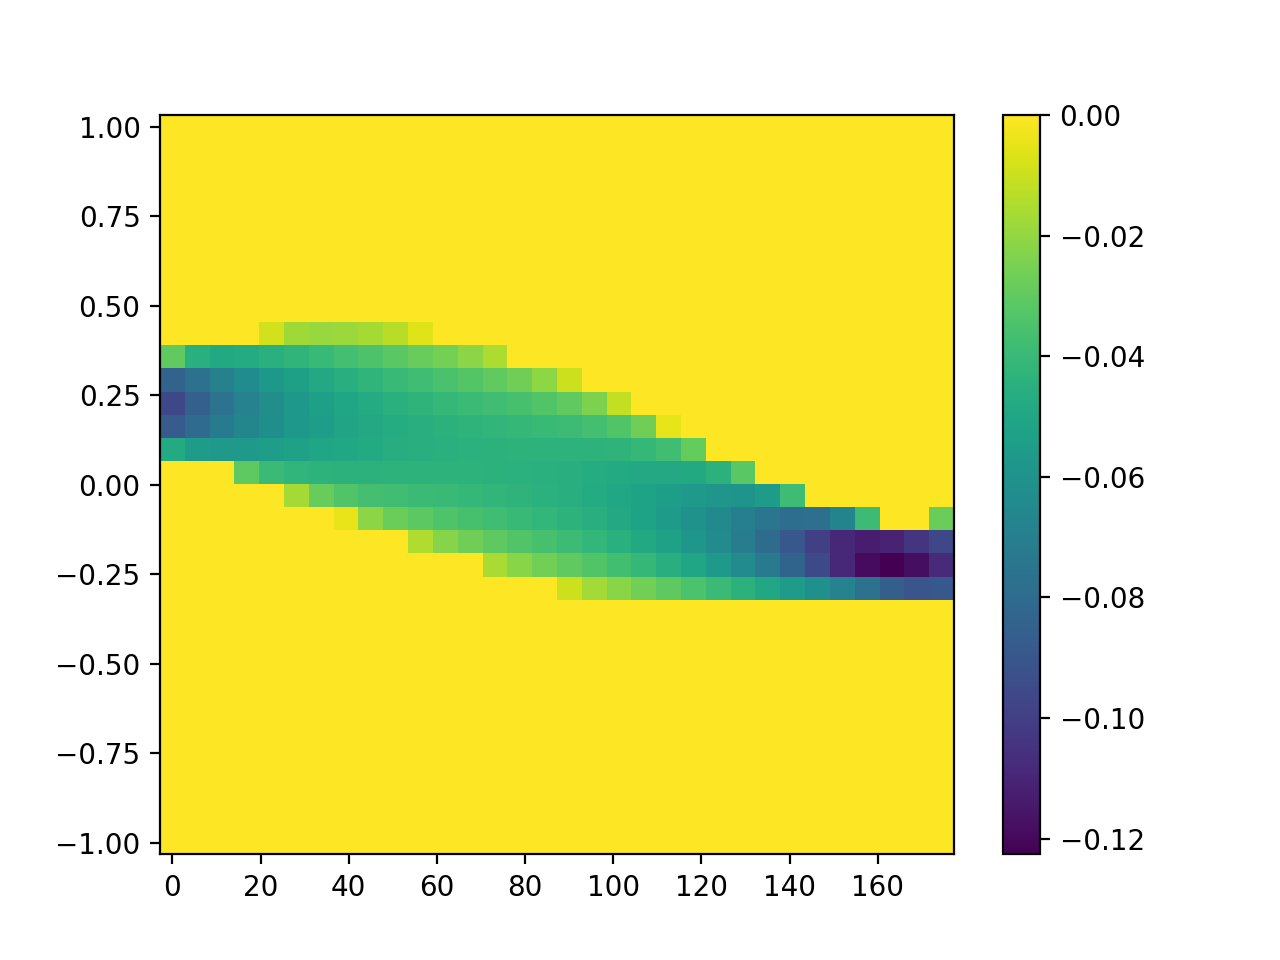

In [7]:
fig, ax = plt.subplots()
im = grid.imshow(ax, S, aspect='auto')
fig.colorbar(im)

In [8]:
S_Omega_grid, S_Omega = grid.spectrum(S, axis=0)

In [9]:
grid

RegularGrid(axis_x=RegularAxis(x0=0, T=5.625, N=32), axis_y=RegularAxis(x0=-1, T=0.06451612903225806, N=32))

In [10]:
S_Omega_grid

RegularGrid(axis_x=RegularAxis(x0=0, T=5.625, N=32), axis_y=FFTRegularAxis(x0=-48.6946861306418, T=3.0434178831651124, N=32))

<IPython.core.display.Javascript object>


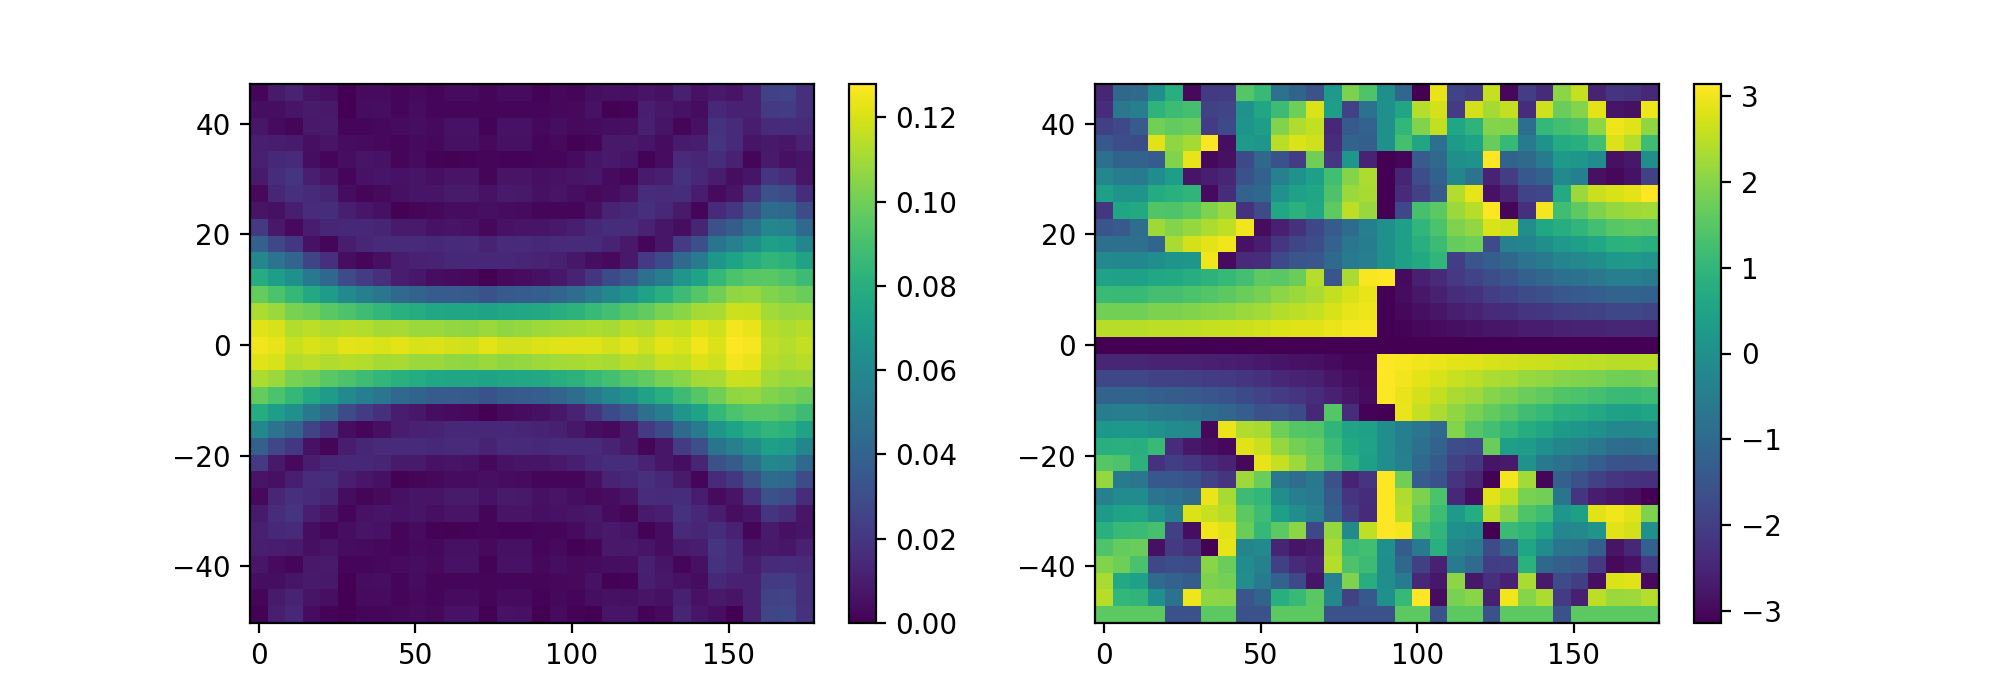

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_Omega), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_Omega), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [12]:
S_theory = e.proj_ft(S_Omega_grid.to_Hz(axis=0))

In [13]:
S_Omega_grid.to_Hz(axis=0)

RegularGrid(axis_x=RegularAxis(x0=0, T=5.625, N=32), axis_y=FFTRegularAxis(x0=-7.75, T=0.484375, N=32))

In [14]:
S_Omega_grid.to_Hz(axis=0).axis_x

RegularAxis(x0=0, T=5.625, N=32)

In [15]:
S_Omega_grid

RegularGrid(axis_x=RegularAxis(x0=0, T=5.625, N=32), axis_y=FFTRegularAxis(x0=-48.6946861306418, T=3.0434178831651124, N=32))

<IPython.core.display.Javascript object>


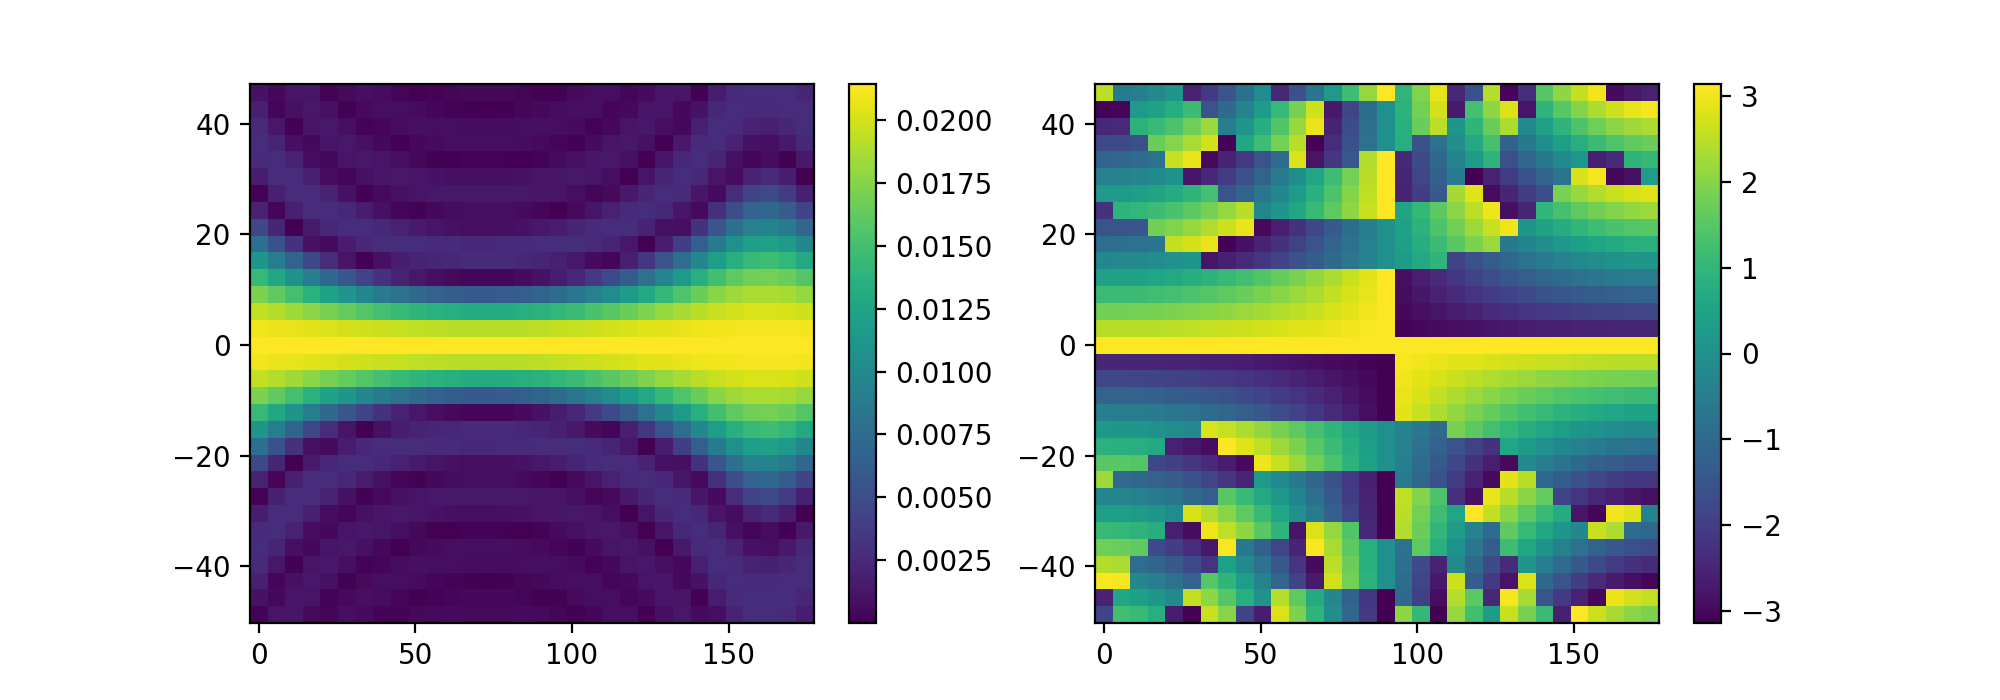

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_theory), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_theory), aspect='auto')
fig.colorbar(im, ax=ax[1]);

In [17]:
S_theory_rect = e.proj_ft(S_Omega_grid.to_Hz(axis=0), rect=True)

<IPython.core.display.Javascript object>


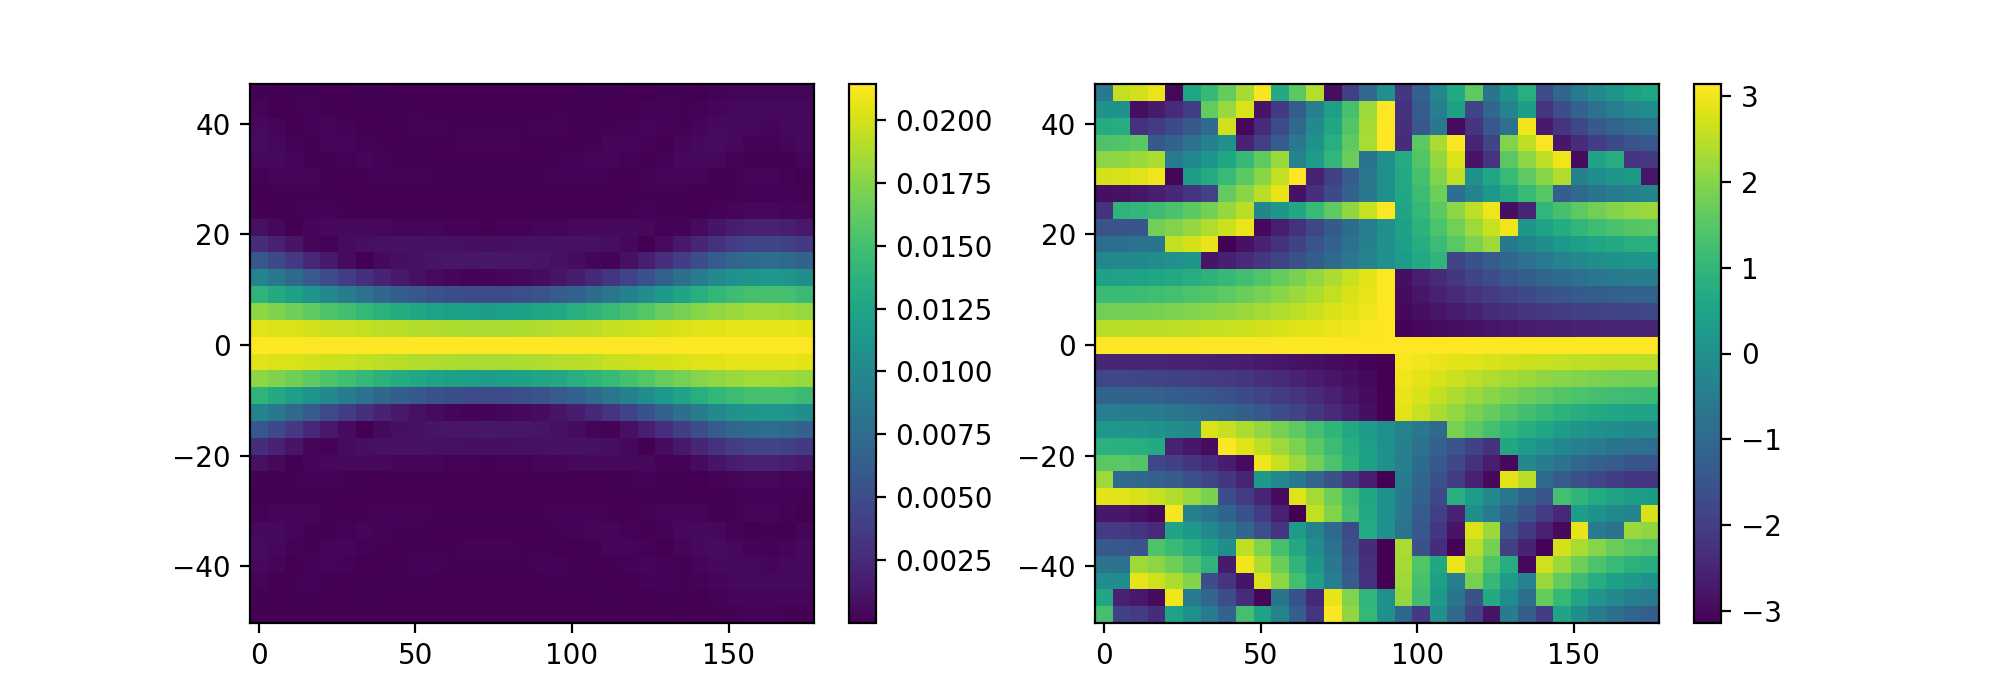

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = S_Omega_grid.imshow(ax[0], np.abs(S_theory_rect), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = S_Omega_grid.imshow(ax[1], np.angle(S_theory_rect), aspect='auto')
fig.colorbar(im, ax=ax[1]);